In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Import TDA pipeline requirements
import gudhi as gd
import json

from glob import glob
import os
import tifffile as tf

from scipy import ndimage

In [2]:
maximgsize = 1200

src = '../proc/'
dst = '../gudhi/'

sample = 'B1'

tsrc = src + sample + '/'
sdst = dst + sample + '/'
if not os.path.isdir(sdst):
    os.mkdir(sdst)

In [3]:
transcriptomes = sorted([foo.split('/')[-2] for foo in glob(tsrc + '*/')])
print(len(transcriptomes), 'transcriptomes')

27 transcriptomes


In [4]:
tidx = 15
tiffs = sorted(glob(tsrc + transcriptomes[tidx] + '/*.tif'))
tdst = sdst + transcriptomes[tidx] + '/'
if not os.path.isdir(tdst):
    os.mkdir(tdst)
    
cidx = 6
print(tiffs[cidx])
img = tf.imread(tiffs[cidx])
if max(img.shape) > maximgsize:
    zoom = maximgsize/max(img.shape)
    print(tiffs[cidx], '\nResized', img.shape, 'by a factor of ', zoom)
    img = ndimage.zoom(img, zoom = zoom, order=1, mode='reflect')
    print('Now', img.shape, '\n----')

../proc/B1/GLYMA_09G216800/GLYMA_09G216800_-_00140_-_00152.tif


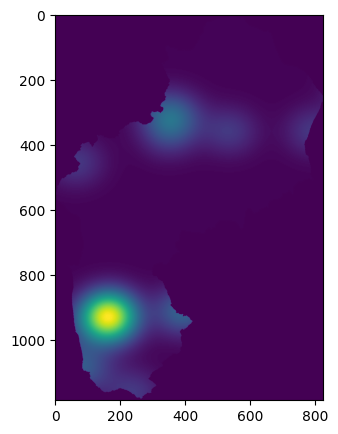

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax = np.atleast_1d(ax).ravel()
ax[0].imshow(img)
#ax[1].imshow(zimg);

In [8]:
print(img.min(), img.max(), 255-img.max())
#print(zimg.min(), zimg.max(), 255-zimg.max())

0 128 127


In [10]:
cc = gd.CubicalComplex(top_dimensional_cells = img)
pers = cc.persistence(homology_coeff_field=2, min_persistence=1)
filename = tdst + 'sublevel_' + os.path.splitext(os.path.split(tiffs[cidx])[1])[0] + '.json'
with open(filename, 'w') as f:
    json.dump(pers,f)
pers

[(1, (0.0, 128.0)),
 (1, (1.0, 50.0)),
 (1, (2.0, 20.0)),
 (1, (4.0, 20.0)),
 (1, (24.0, 40.0)),
 (1, (18.0, 21.0)),
 (1, (35.0, 38.0)),
 (1, (19.0, 21.0)),
 (0, (0.0, inf))]

In [12]:
cc = gd.CubicalComplex(top_dimensional_cells = 255 - img)
pers = cc.persistence(homology_coeff_field=2, min_persistence=1)
filename = tdst + 'superlevel_' + os.path.splitext(os.path.split(tiffs[cidx])[1])[0] + '.json'
with open(filename, 'w') as f:
    json.dump(pers,f)
pers

[(0, (127.0, inf)),
 (0, (205.0, 254.0)),
 (0, (235.0, 253.0)),
 (0, (215.0, 231.0)),
 (0, (235.0, 251.0)),
 (0, (217.0, 220.0)),
 (0, (234.0, 237.0)),
 (0, (234.0, 236.0))]

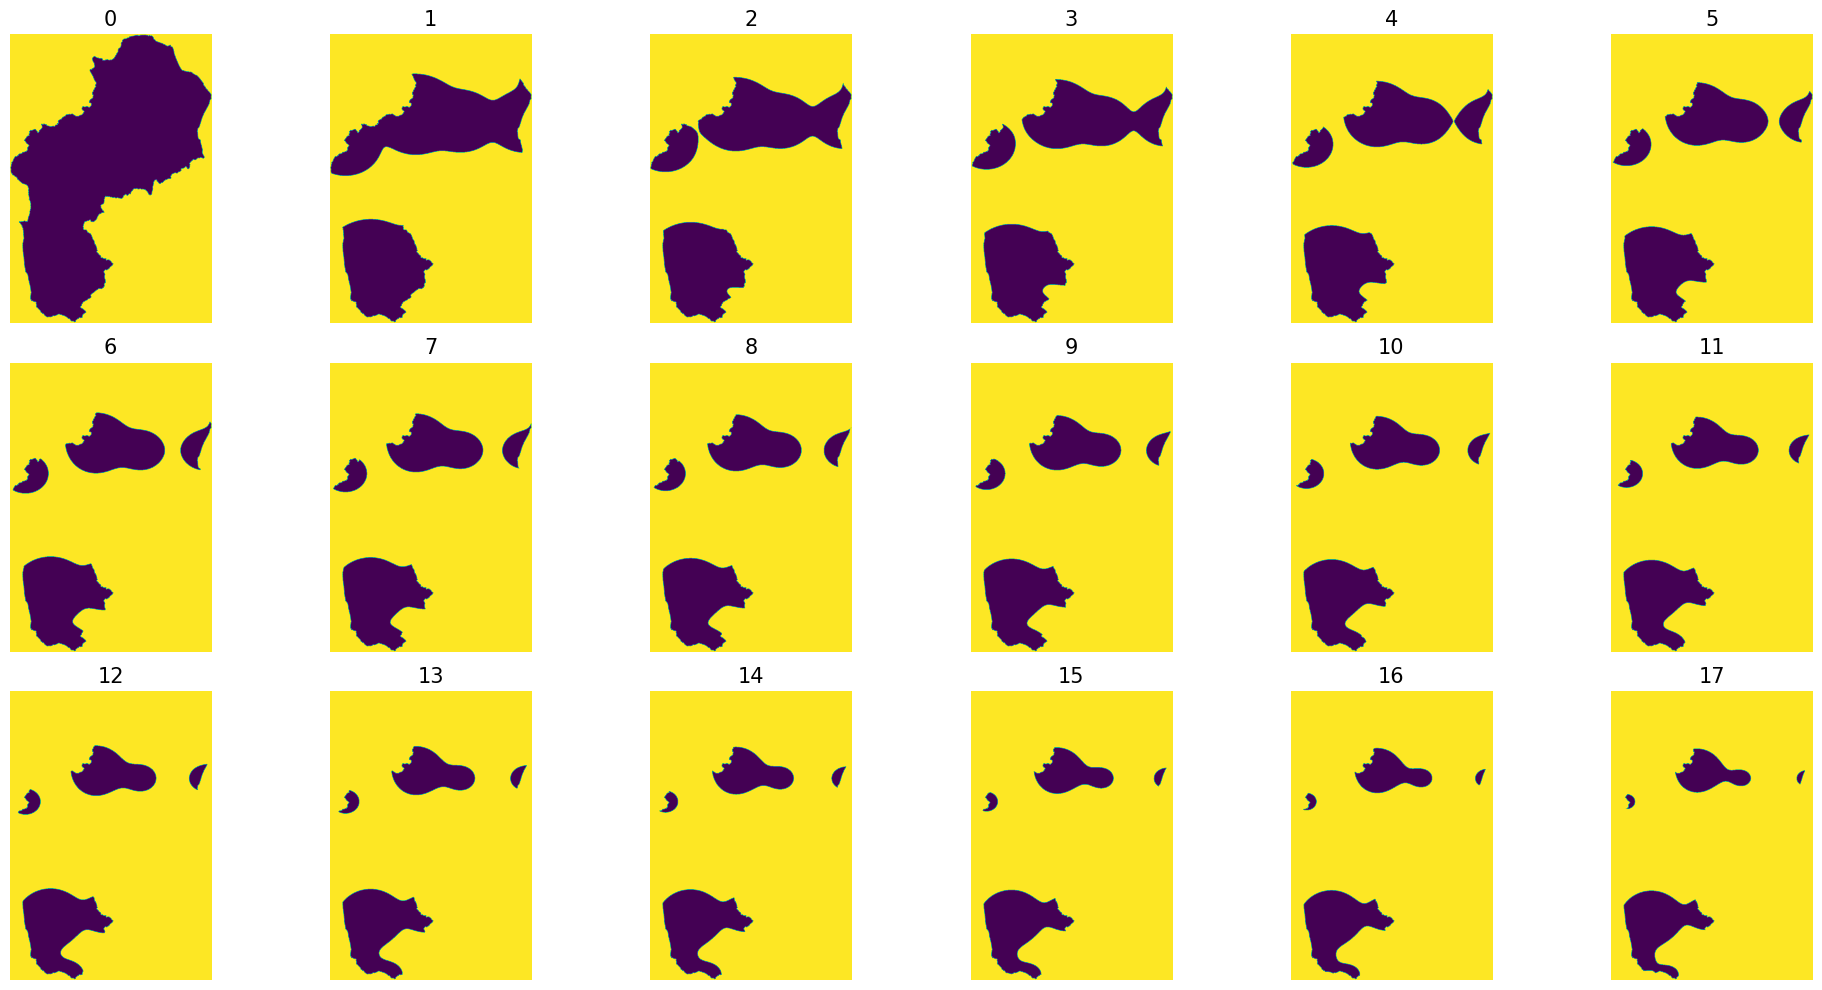

In [13]:
fig, ax = plt.subplots(3,6, figsize=(20,10), sharex=True, sharey=True)
ax = ax.ravel()
k = 0

for i in range(len(ax)):
    ax[i].imshow(img <= k + i, vmin=0, vmax=1);
    ax[i].set_title(k + i, fontsize=15)
    ax[i].axis('off');

fig.tight_layout();

In [18]:
# read the file
with open(filename) as f:
   lst1 = [tuple(x) for x in json.load(f)]
   print(f'lst1: {lst1}')

lst1: [(0, [127.0, inf]), (0, [205.0, 254.0]), (0, [235.0, 253.0]), (0, [215.0, 231.0]), (0, [235.0, 251.0]), (0, [217.0, 220.0]), (0, [234.0, 237.0]), (0, [234.0, 236.0])]


In [19]:
lst1

[(0, [127.0, inf]),
 (0, [205.0, 254.0]),
 (0, [235.0, 253.0]),
 (0, [215.0, 231.0]),
 (0, [235.0, 251.0]),
 (0, [217.0, 220.0]),
 (0, [234.0, 237.0]),
 (0, [234.0, 236.0])]

In [77]:
pp = np.asarray([pers[i][1] for i in range(len(lst1)) ])
np.isinf(pp[0,1])

True

In [73]:
gd.bottleneck_distance(pp, pp)

1.2765967415459356e-308